<a href="https://colab.research.google.com/github/niravmistry09/Blank-Space-Detection/blob/main/blank_space_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset

train_data = load_dataset(
    "jbarrow/CommonForms",
    split="train",
    streaming=True
)

val_data = load_dataset(
    "jbarrow/CommonForms",
    split="valid",
    streaming=True
)

test_data= load_dataset(
    "jbarrow/CommonForms",
    split="test",
    streaming=True
)
train_data = train_data.take(5500)
val_data = val_data.take(550)
test_data = test_data.take(550)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 385c4dfe-f7f1-48fc-9784-597d6dc98d49)')' thrown while requesting HEAD https://huggingface.co/datasets/jbarrow/CommonForms/resolve/main/README.md
Retrying in 1s [Retry 1/5].


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/322 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

for split in ["train", "val", "test"]:
    os.makedirs(f"dataset/images/{split}", exist_ok=True)
    os.makedirs(f"dataset/labels/{split}", exist_ok=True)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.6 MB/s eta 0:00:00


In [ ]:
import os, cv2, numpy as np, yaml
from ultralytics import YOLO


# 2. Optimized Conversion Function
def convert(dataset, split_name, max_samples):
    img_dir = f"dataset/images/{split_name}"
    label_dir = f"dataset/labels/{split_name}"

    for i, s in enumerate(dataset):
        if i >= max_samples: break

        # PIL to OpenCV conversion
        img = cv2.cvtColor(np.array(s["image"]), cv2.COLOR_RGB2BGR)
        h, w, _ = img.shape
        cv2.imwrite(f"{img_dir}/{i}.jpg", img)

        # Labels extraction (CommonForms specific keys)
        with open(f"{label_dir}/{i}.txt", "w") as f:
            for box, cls in zip(s["objects"]["bbox"], s["objects"]["category"]):
                x, y, bw, bh = box
                # YOLO Normalization
                f.write(f"{cls} {(x + bw/2)/w} {(y + bh/2)/h} {bw/w} {bh/h}\n")

# Data processing
convert(train_data, "train", 5500)
convert(val_data, "val", 550)
convert(test_data, "test", 550)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 3dd62844-5681-4d9f-9767-ee3bae5fef10)')' thrown while requesting GET https://huggingface.co/datasets/jbarrow/CommonForms/resolve/113eb31af48b24fadb7cfc38a4b87c82eaebadba/data/train-00002-of-00322.parquet
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 8abe27d7-ca41-4478-bb2c-21ca1764d9d8)')' thrown while requesting GET https://huggingface.co/datasets/jbarrow/CommonForms/resolve/113eb31af48b24fadb7cfc38a4b87c82eaebadba/data/valid-00000-of-00012.parquet
Retrying in 1s [Retry 1/5].


In [ ]:
# 3. Create data.yaml file programmatically
data_yaml = {
    'path': os.path.abspath('dataset'),
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 3,
    'names': ['text_input', 'checkbox', 'signature']
}

with open('data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)



In [ ]:
# 4. Training
model = YOLO("yolo26n.pt")
model.train(data="data.yaml", epochs=30, imgsz=640,device=0)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782058e2e000>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model.val(data='/content/data.yaml',split="test")

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,421 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 94.2±40.1 MB/s, size: 438.8 KB)
val: Scanning /content/dataset/labels/test... 550 images, 177 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 550/550 515.2it/s 1.1s
val: New cache created: /content/dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 2.3it/s 15.3s
                   all        550       9168      0.798      0.426      0.473      0.274
            text_input        362       6880      0.722       0.67      0.713      0.461
              checkbox        175       2243      0.672      0.609      0.601      0.288
             signature         33         45          1          0      0.106     0.0721
Speed: 2.4ms preprocess, 7.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Re

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7820577c3da0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
cp -r dataset /content/drive/MyDrive/


In [ ]:
model.predict(source="/content/Orange Green Colorful Border Student Admission Form A4 Document_page_1.png")


image 1/1 /content/Orange Green Colorful Border Student Admission Form A4 Document_page_1.png: 640x480 29 text_inputs, 99.5ms
Speed: 8.0ms preprocess, 99.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'text_input', 1: 'checkbox', 2: 'signature'}
 obb: None
 orig_img: array([[[ 69, 193, 233],
         [ 69, 193, 233],
         [ 69, 193, 233],
         ...,
         [223, 222, 207],
         [223, 222, 207],
         [223, 222, 207]],
 
        [[ 69, 193, 233],
         [ 69, 193, 233],
         [ 69, 193, 233],
         ...,
         [223, 222, 207],
         [223, 222, 207],
         [223, 222, 207]],
 
        [[ 69, 193, 233],
         [ 69, 193, 233],
         [ 69, 193, 233],
         ...,
         [223, 222, 207],
         [223, 222, 207],
         [223, 222, 207]],
 
        ...,
 
        [[ 23,  74, 228],
         [ 23,  74, 228],
         [ 23,  74, 228],
         ...,
         [223, 222, 207],
         [223, 222, 207],
         [223, 222, 207]],
 
        [[ 23,  74, 228],
         [ 23,  74, 228],
         [ 23,  74, 228

(np.float64(-0.5), np.float64(2481.5), np.float64(3509.5), np.float64(-0.5))

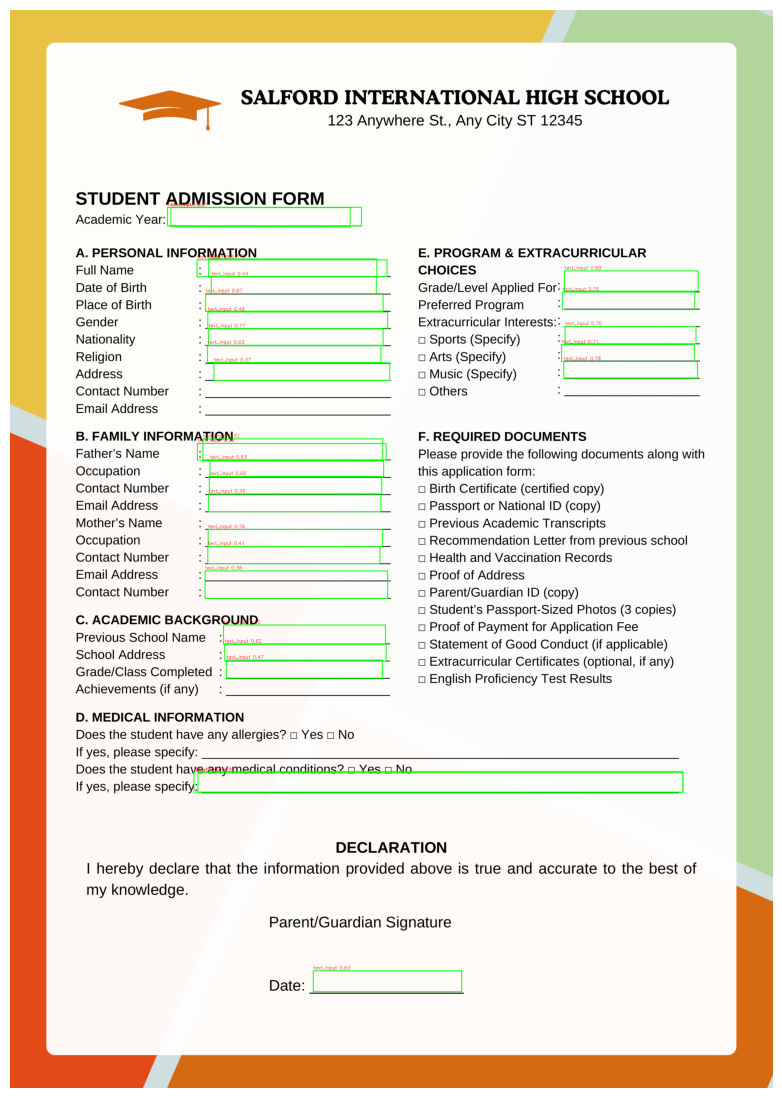

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/Orange Green Colorful Border Student Admission Form A4 Document_page_1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        name = r.names[cls]
        conf = float(box.conf[0])

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"{name} {conf:.2f}", (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.figure(figsize=(10,14))
plt.imshow(img)
plt.axis("off")



image 1/1 /content/Orange Green Colorful Border Student Admission Form A4 Document_page_1.png: 640x480 29 text_inputs, 14.5ms
Speed: 6.6ms preprocess, 14.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


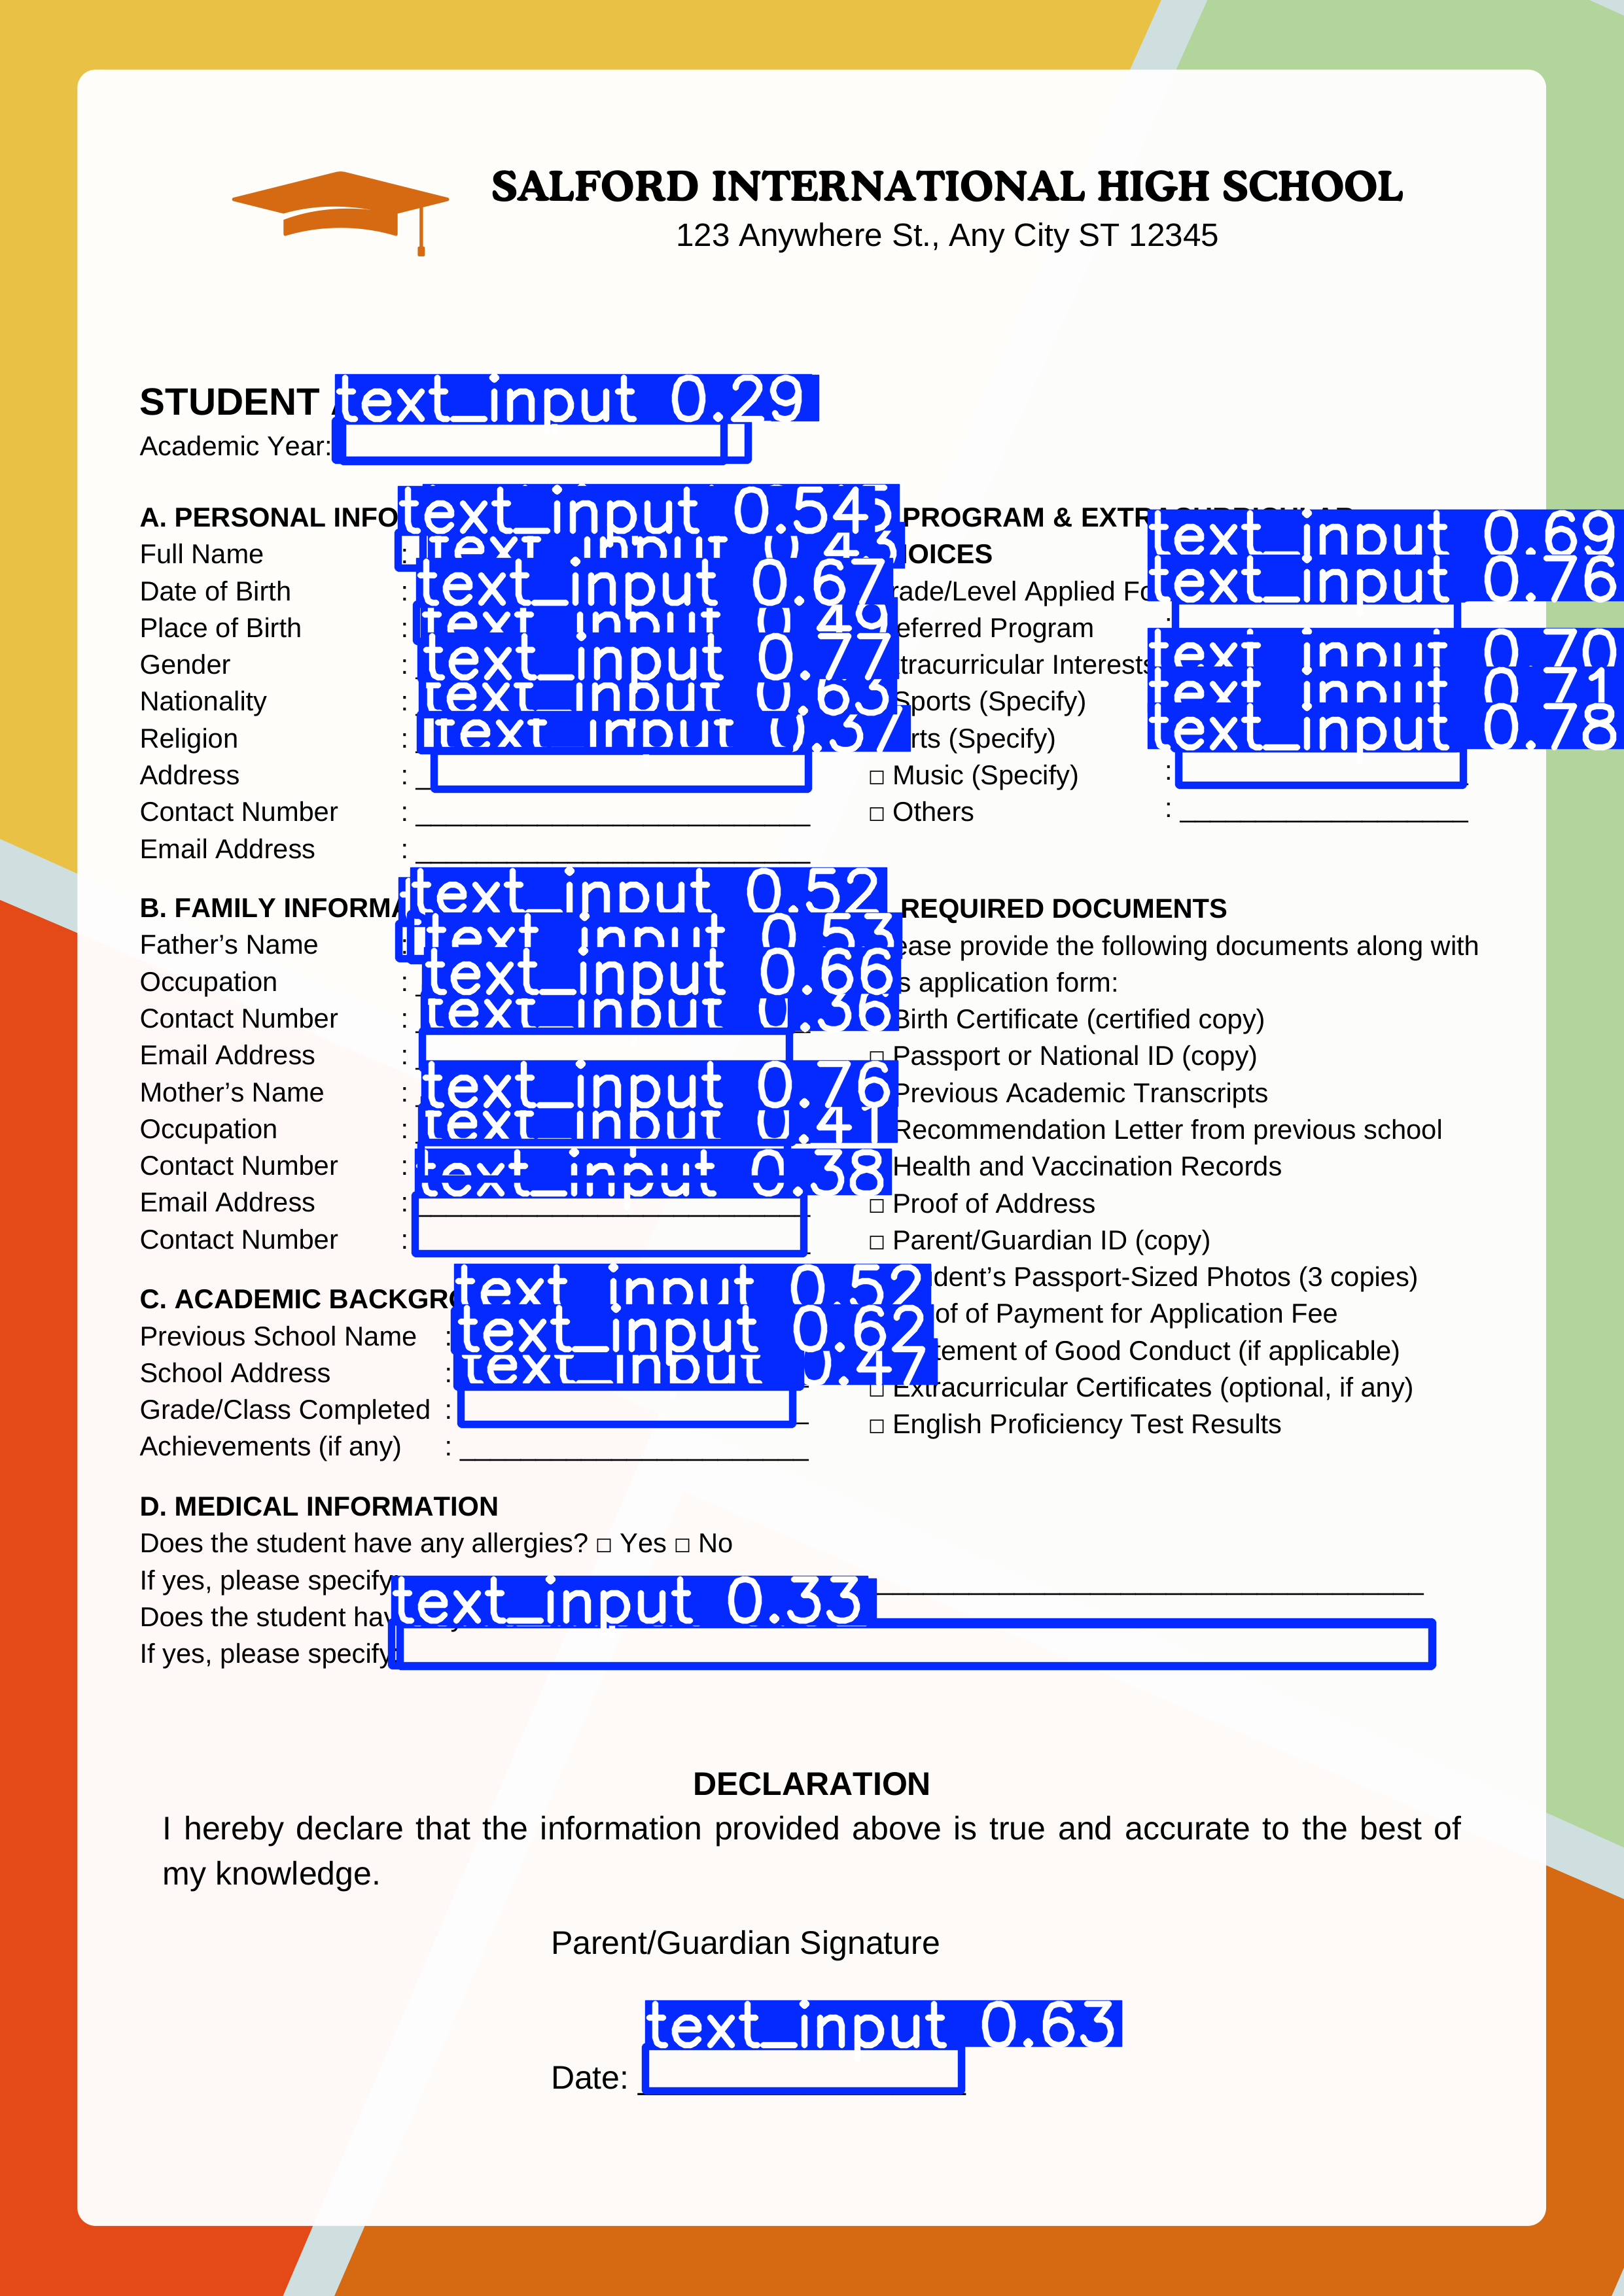

In [ ]:
results = model("/content/Orange Green Colorful Border Student Admission Form A4 Document_page_1.png")

# Show image with boxes
results[0].show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/JUMAT_page_1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        name = r.names[cls]
        conf = float(box.conf[0])

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"{name} {conf:.2f}", (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.figure(figsize=(10,14))
plt.imshow(img)
plt.axis("off")


image 1/1 /content/JUMAT_page_1.png: 640x480 14 text_inputs, 3 checkboxs, 13.3ms
Speed: 4.5ms preprocess, 13.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


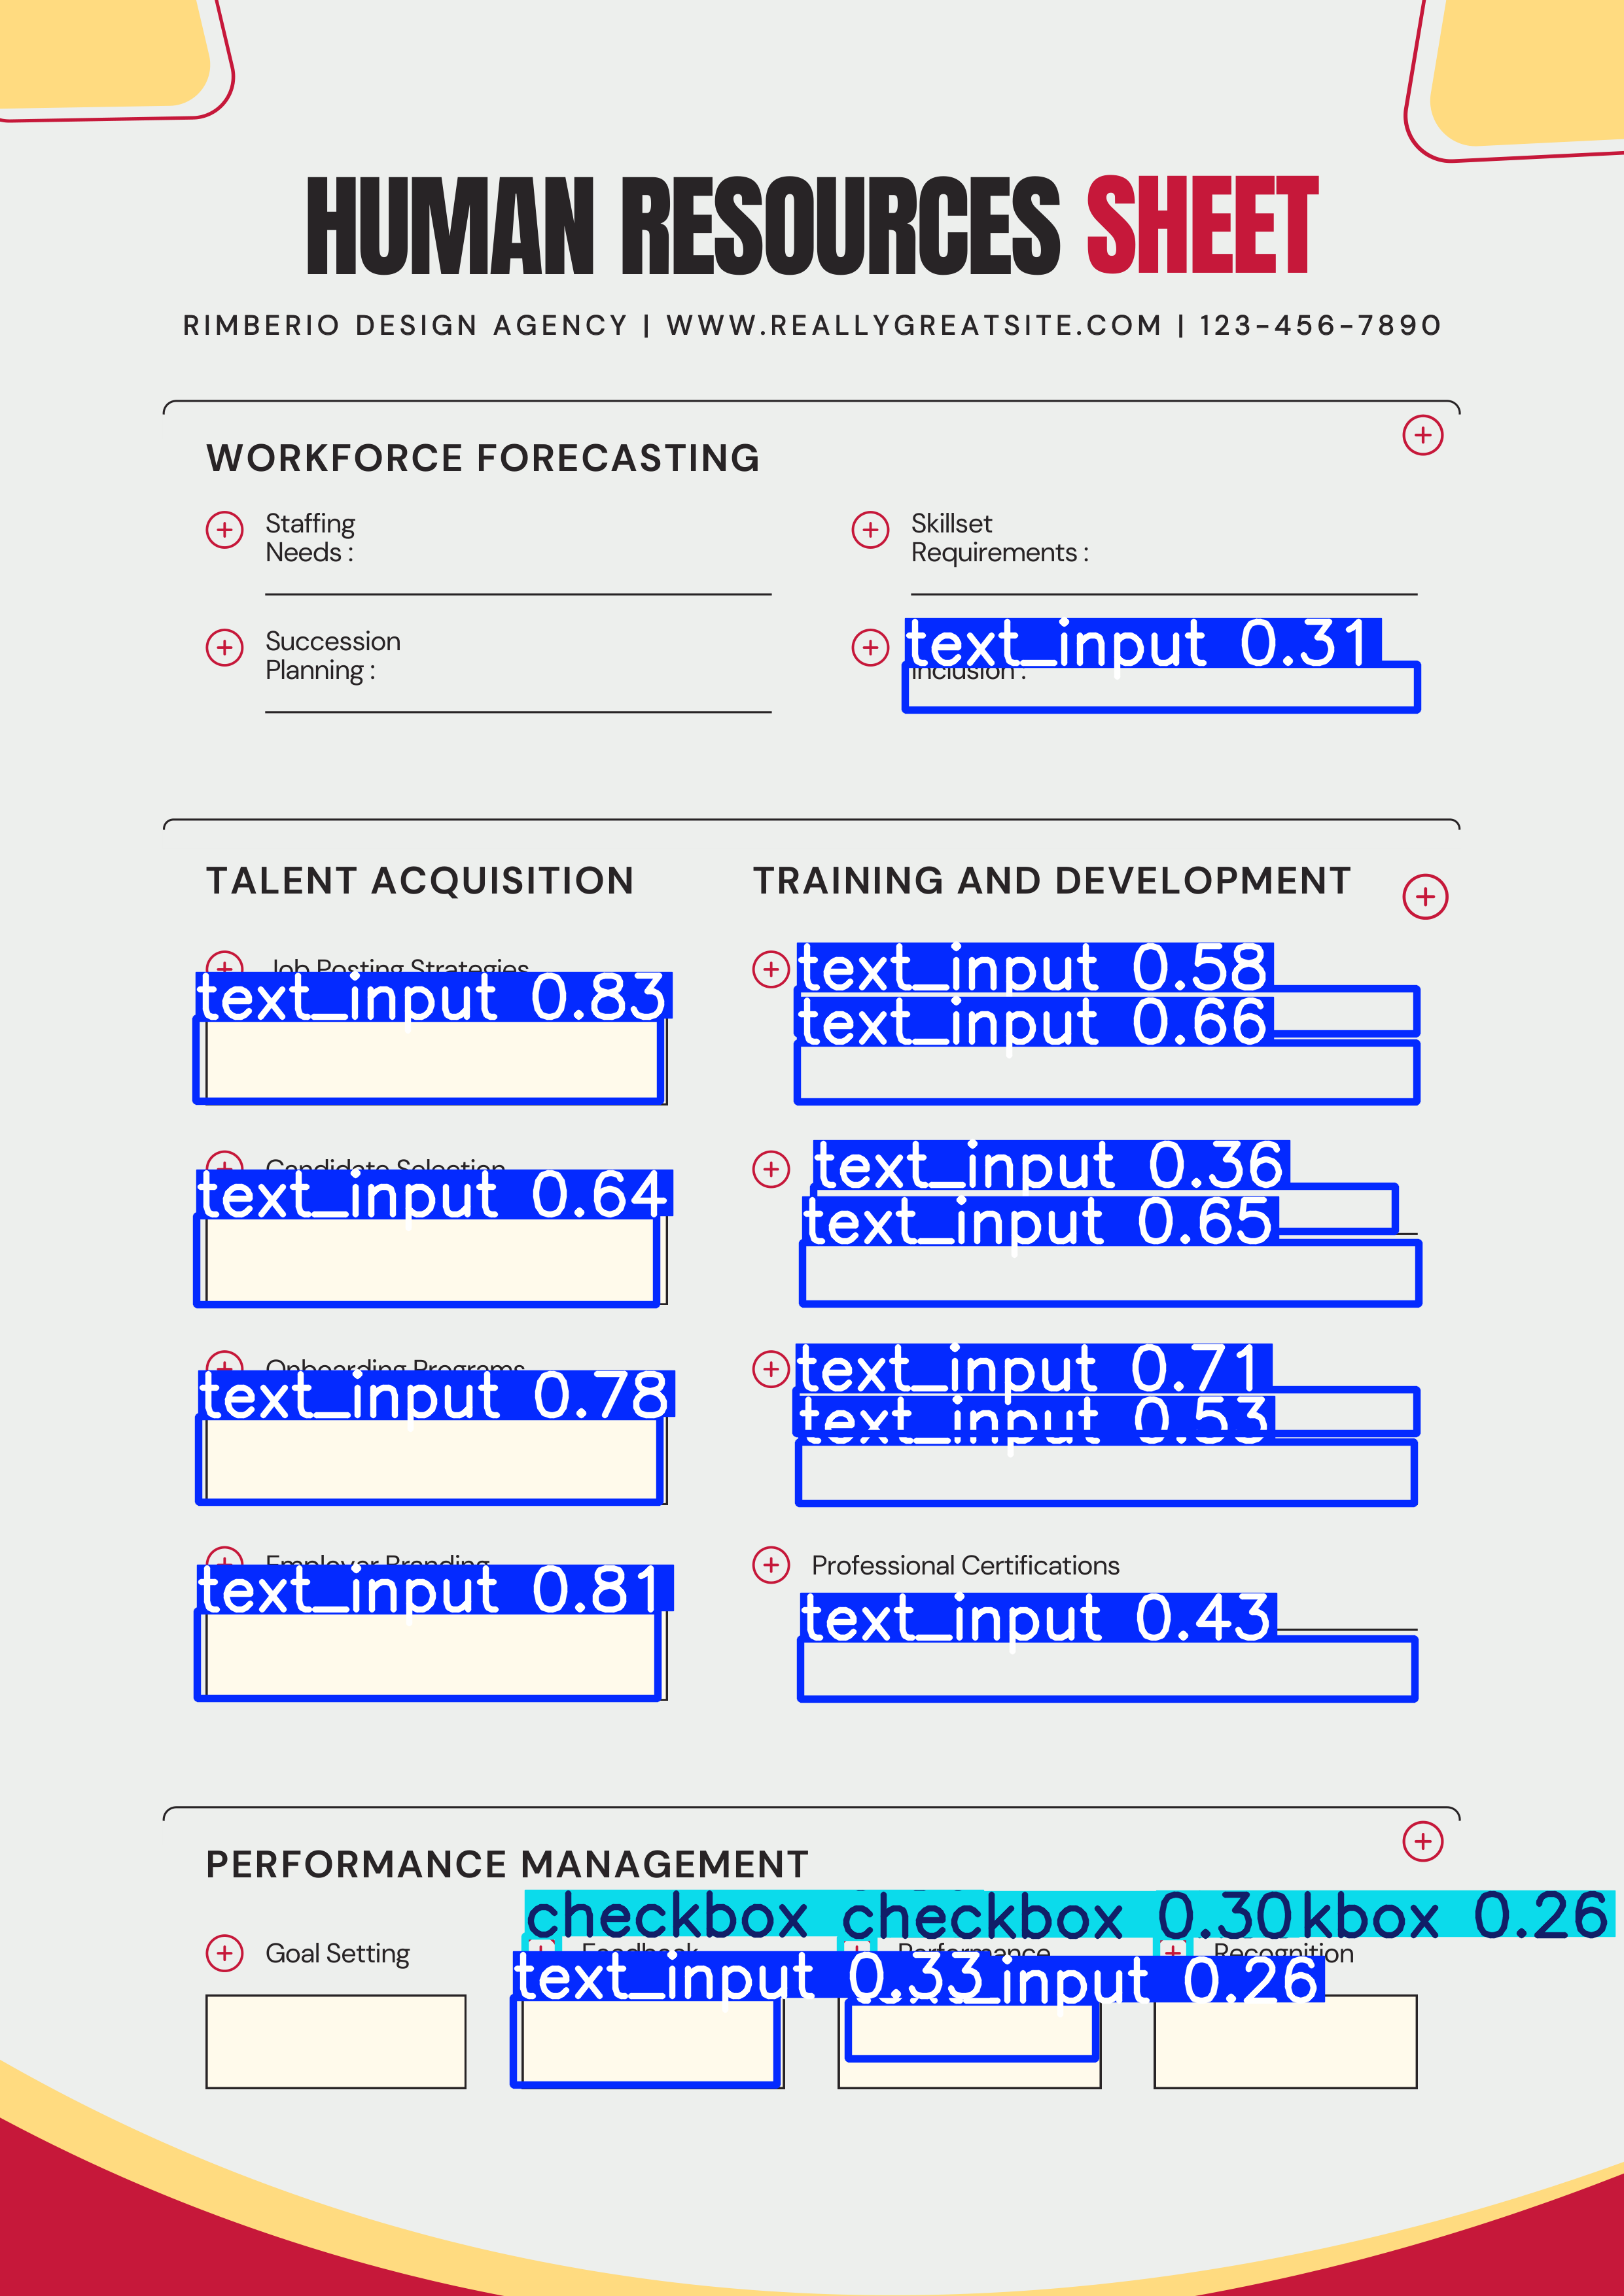

In [ ]:
results = model("/content/JUMAT_page_1.png")

# Show image with boxes
results[0].show()